In [1]:
from modules.general.F_search import *
from modules.graph.hist1D import *

import matplotlib.pyplot as plt
import numpy as np
import h5py
import sys
import re

# Create general h5 for all data
INPUT = "/home/franky8939/GITHUP/DarkSUSY-master/data/h5_muon/DarkSUSY.h5"

# Si existe el archivo OUTPUT ACTUALIZARLO #
if os.path.exists(INPUT):
    hf = h5py.File(INPUT, 'r')
else:
    print(" :: Datos de entrada inexistentes:: ")
    sys.exit()


steps = float(20)
div = float(20)

INPUT_MassInv_CMS_all = None
OUTPUT_MassInv_CMS = None
range_MassInv_CMS = [-0.001, 15]
size_MassInv_CMS = (range_MassInv_CMS[1] - range_MassInv_CMS[0]) / div

# Funcion para generar histograma
def histF(inp, sizes, steps, range):
    steps = steps + 1
    cens = np.linspace(range[0], range[1], steps)
    outX = []
    outY = []
    N = len(inp[(inp < np.max(range)) * (inp > np.min(range))])
    for cen in cens:
        if (cen + sizes) >= np.max(range):
            sizeC = np.max(range) - cen
            log = (inp > (cen - sizes)) * ((cen + sizeC) > inp)
            val = inp[log]
            if N > 0:
                # print(len(val), " ", N, " ", sizeC, "0")
                outY.append(len(val) / (N * (sizes + sizeC)))
            else:
                outY.append(0)

        elif (cen - sizes) <= np.min(range):
            sizeC = cen - np.min(range)
            log = (inp < (cen + sizes)) * ((cen - sizeC) < inp)
            val = inp[log]
            if N > 0:
                # print(len(val), " ", N, " ", sizeC, "1")
                outY.append(len(val) / (N * (sizes + sizeC)))
            else:
                outY.append(0)
        else:
            sizeC = 0
            log = (inp > (cen - sizes)) * ((cen + sizes) > inp)
            val = inp[log]
            if N > 0:
                # print(len(val), " ", N, " ", sizes, "2")
                outY.append(len(val) / (N * 2 * sizes))
            else:
                outY.append(0)

        # outY.append(len(val)/(N*sizes))
        # print(sizeC)
        outX.append(cen)
    return outX, outY

In [2]:
MassInv_0_25_CMS =np.array([])
MassInv_1_CMS =np.array([])
MassInv_2_CMS =np.array([])
MassInv_3_CMS =np.array([])
MassInv_4_CMS =np.array([])
MassInv_5_CMS =np.array([])
MassInv_6_CMS =np.array([])
MassInv_7_CMS =np.array([])
MassInv_8_CMS =np.array([])
MassInv_9_CMS =np.array([])

MassInv_0_25_HL =np.array([])
MassInv_1_HL =np.array([])
MassInv_2_HL =np.array([])
MassInv_3_HL =np.array([])
MassInv_4_HL =np.array([])
MassInv_5_HL =np.array([])
MassInv_6_HL =np.array([])
MassInv_7_HL =np.array([])
MassInv_8_HL =np.array([])
MassInv_9_HL =np.array([])
# prueba
for MNeuL in hf.keys():
    # print(MNeuL)
    MNeuD_all = hf.require_group(MNeuL)
    for MNeuD in MNeuD_all.keys():
        # print(MNeuL + "/" + MNeuD)
        MPhoD_all = hf.require_group(MNeuL + "/" + MNeuD)
        for MPhoD in MPhoD_all.keys():
            # print(MNeuL + "/" + MNeuD + "/" + MPhoD)
            TcPhoD_all = hf.require_group(MNeuL + "/" + MNeuD + "/" + MPhoD)
            for TcPhoD in TcPhoD_all.keys():
                # print(MNeuL + "/" + MNeuD + "/" + MPhoD + "/" + TcPhoD)
                Data_Card = hf.require_group(MNeuL + "/" + MNeuD + "/" + MPhoD + "/" + TcPhoD)
                for Card in Data_Card.keys():
                    # Identifiacion del archivo en Name_of_FileROOT
                    # print(MNeuL + "/" + MNeuD + "/" + MPhoD + "/" + TcPhoD + "/" + Card)
                    FileROOT = hf.require_group(MNeuL + "/" + MNeuD + "/" + MPhoD + "/" + TcPhoD + "/" + Card)
                    if np.array(FileROOT.get("Verification")) is "OFF" or \
                            np.array(FileROOT.get("Mu_Entries")).shape[0] < 10:  # Mal Introducida Data
                        continue

                    name = str(np.array(FileROOT.get("Name_of_FileROOT")))
                    # print(name)
                    Values = Ob_Value(name)
                    INPUT_VAR = [float(Values["MNeuL"]), float(Values["MNeuD"]),
                                 float(Values["MPhoD"]), float(Values["TcPhoD"])]
                    #print(INPUT_VAR)

                    # var in the respective root
                    MassInv = np.array(FileROOT.get("MassInv"))
                    if MPhoD=='MPhoD_0.25':
                        if Card=="_CMS_":
                            MassInv_0_25_CMS = np.hstack((MassInv_0_25_CMS, MassInv.flatten()))
                        elif Card=="_HL_":
                            MassInv_0_25_HL = np.hstack((MassInv_0_25_HL, MassInv.flatten()))
                    elif MPhoD=='MPhoD_1':
                        if Card=="_CMS_":
                            MassInv_1_CMS = np.hstack((MassInv_1_CMS, MassInv.flatten()))
                        elif Card=="_HL_":
                            MassInv_1_HL = np.hstack((MassInv_1_HL, MassInv.flatten()))
                    elif MPhoD=='MPhoD_2':
                        if Card=="_CMS_":
                            MassInv_2_CMS = np.hstack((MassInv_2_CMS, MassInv.flatten()))
                        elif Card=="_HL_":
                            MassInv_2_HL = np.hstack((MassInv_2_HL, MassInv.flatten()))
                    elif MPhoD=='MPhoD_3':
                        if Card=="_CMS_":
                            MassInv_3_CMS = np.hstack((MassInv_3_CMS, MassInv.flatten()))
                        elif Card=="_HL_":
                            MassInv_3_HL = np.hstack((MassInv_3_HL, MassInv.flatten()))
                    elif MPhoD=='MPhoD_4':
                        if Card=="_CMS_":
                            MassInv_4_CMS = np.hstack((MassInv_4_CMS, MassInv.flatten()))
                        elif Card=="_HL_":
                            MassInv_4_HL = np.hstack((MassInv_4_HL, MassInv.flatten()))
                    elif MPhoD=='MPhoD_5':
                        if Card=="_CMS_":
                            MassInv_5_CMS = np.hstack((MassInv_5_CMS, MassInv.flatten()))
                        elif Card=="_HL_":
                            MassInv_5_HL = np.hstack((MassInv_5_HL, MassInv.flatten()))
                    elif MPhoD=='MPhoD_6':
                        if Card=="_CMS_":
                            MassInv_6_CMS = np.hstack((MassInv_6_CMS, MassInv.flatten()))
                        elif Card=="_HL_":
                            MassInv_6_HL = np.hstack((MassInv_6_HL, MassInv.flatten()))
                    elif MPhoD=='MPhoD_7':
                        if Card=="_CMS_":
                            MassInv_7_CMS = np.hstack((MassInv_7_CMS, MassInv.flatten()))
                        elif Card=="_HL_":
                            MassInv_7_HL = np.hstack((MassInv_7_HL, MassInv.flatten()))
                    elif MPhoD=='MPhoD_8':
                        if Card=="_CMS_":
                            MassInv_8_CMS = np.hstack((MassInv_8_CMS, MassInv.flatten()))
                        elif Card=="_HL_":
                            MassInv_8_HL = np.hstack((MassInv_8_HL, MassInv.flatten()))
                    elif MPhoD=='MPhoD_9':
                        if Card=="_CMS_":
                            MassInv_9_CMS = np.hstack((MassInv_9_CMS, MassInv.flatten()))
                        elif Card=="_HL_":
                            MassInv_9_HL = np.hstack((MassInv_9_HL, MassInv.flatten()))

hf.close()

/home/franky8939/PROGRAMAS/anaconda3/envs/py27root/lib/python2.7/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


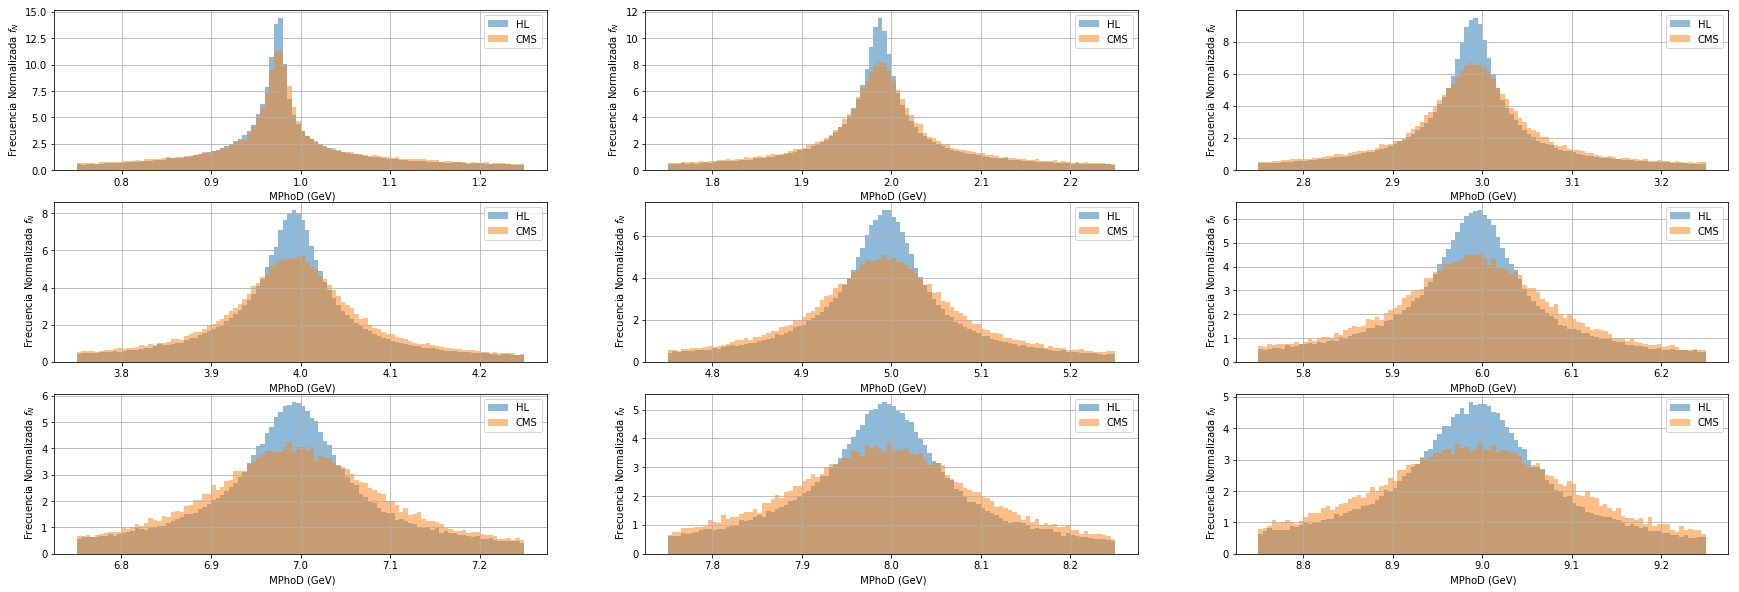

In [28]:
plt.rcParams['figure.figsize'] = [30, 10]
fig = plt.figure()

ax = fig.add_subplot(3, 3, 1)
ax.hist(MassInv_1_HL[(MassInv_1_HL>0.75)*(MassInv_1_HL<1.25)], bins=100, alpha=0.5, normed=True)
ax.hist(MassInv_1_CMS[(MassInv_1_CMS>0.75)*(MassInv_1_CMS<1.25)], bins=100, alpha=0.5, normed=True)
ax.legend(["HL", "CMS"])
ax.set_xlabel(" MPhoD (GeV)")
ax.set_ylabel(" Frecuencia Normalizada $f_N$")
ax.grid(True)

ax = fig.add_subplot(3, 3, 2)
ax.hist(MassInv_2_HL[(MassInv_2_HL>1.75)*(MassInv_2_HL<2.25)], bins=100, alpha=0.5, normed=True)
ax.hist(MassInv_2_CMS[(MassInv_2_CMS>1.75)*(MassInv_2_CMS<2.25)], bins=100, alpha=0.5, normed=True)
ax.legend(["HL", "CMS"])
ax.set_xlabel(" MPhoD (GeV)")
ax.set_ylabel(" Frecuencia Normalizada $f_N$")
ax.grid(True)

ax = fig.add_subplot(3, 3, 3)
ax.hist(MassInv_3_HL[(MassInv_3_HL>2.75)*(MassInv_3_HL<3.25)], bins=100, alpha=0.5, normed=True)
ax.hist(MassInv_3_CMS[(MassInv_3_CMS>2.75)*(MassInv_3_CMS<3.25)], bins=100, alpha=0.5, normed=True)
ax.legend(["HL", "CMS"])
ax.set_xlabel(" MPhoD (GeV)")
ax.set_ylabel(" Frecuencia Normalizada $f_N$")
ax.grid(True)

ax = fig.add_subplot(3, 3, 4)
ax.hist(MassInv_4_HL[(MassInv_4_HL>3.75)*(MassInv_4_HL<4.25)], bins=100, alpha=0.5, normed=True)
ax.hist(MassInv_4_CMS[(MassInv_4_CMS>3.75)*(MassInv_4_CMS<4.25)], bins=100, alpha=0.5, normed=True)
ax.legend(["HL", "CMS"])
ax.set_xlabel(" MPhoD (GeV)")
ax.set_ylabel(" Frecuencia Normalizada $f_N$")
ax.grid(True)

ax = fig.add_subplot(3, 3, 5)
ax.hist(MassInv_5_HL[(MassInv_5_HL>4.75)*(MassInv_5_HL<5.25)], bins=100, alpha=0.5, normed=True)
ax.hist(MassInv_5_CMS[(MassInv_5_CMS>4.75)*(MassInv_5_CMS<5.25)], bins=100, alpha=0.5, normed=True)
ax.legend(["HL", "CMS"])
ax.set_xlabel(" MPhoD (GeV)")
ax.set_ylabel(" Frecuencia Normalizada $f_N$")
ax.grid(True)

ax = fig.add_subplot(3, 3, 6)
ax.hist(MassInv_6_HL[(MassInv_6_HL>5.75)*(MassInv_6_HL<6.25)], bins=100, alpha=0.5, normed=True)
ax.hist(MassInv_6_CMS[(MassInv_6_CMS>5.75)*(MassInv_6_CMS<6.25)], bins=100, alpha=0.5, normed=True)
ax.legend(["HL", "CMS"])
ax.set_xlabel(" MPhoD (GeV)")
ax.set_ylabel(" Frecuencia Normalizada $f_N$")
ax.grid(True)

ax = fig.add_subplot(3, 3, 7)
ax.hist(MassInv_7_HL[(MassInv_7_HL>6.75)*(MassInv_7_HL<7.25)], bins=100, alpha=0.5, normed=True)
ax.hist(MassInv_7_CMS[(MassInv_7_CMS>6.75)*(MassInv_7_CMS<7.25)], bins=100, alpha=0.5, normed=True)
ax.legend(["HL", "CMS"])
ax.set_xlabel(" MPhoD (GeV)")
ax.set_ylabel(" Frecuencia Normalizada $f_N$")
ax.grid(True)

ax = fig.add_subplot(3, 3, 8)
ax.hist(MassInv_8_HL[(MassInv_8_HL>7.75)*(MassInv_8_HL<8.25)], bins=100, alpha=0.5, normed=True)
ax.hist(MassInv_8_CMS[(MassInv_8_CMS>7.75)*(MassInv_8_CMS<8.25)], bins=100, alpha=0.5, normed=True)
ax.legend(["HL", "CMS"])
ax.set_xlabel(" MPhoD (GeV)")
ax.set_ylabel(" Frecuencia Normalizada $f_N$")
ax.grid(True)

ax = fig.add_subplot(3, 3, 9)
ax.hist(MassInv_9_HL[(MassInv_9_HL>8.75)*(MassInv_9_HL<9.25)], bins=100, alpha=0.5, normed=True)
ax.hist(MassInv_9_CMS[(MassInv_9_CMS>8.75)*(MassInv_9_CMS<9.25)], bins=100, alpha=0.5, normed=True)
ax.legend(["HL", "CMS"])
ax.set_xlabel(" MPhoD (GeV)")
ax.set_ylabel(" Frecuencia Normalizada $f_N$")
ax.grid(True)

fig.savefig("Datos_Photon4muon_ALL.pdf")
fig.savefig("Datos_Photon4muon_ALL.png")
fig.show()

array([ True,  True,  True, ..., False, False,  True])